<a href="https://colab.research.google.com/github/nanmanchu/APTprice/blob/main/4_Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
#import statsmodels.api as sm; 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력
 
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

#정규화
from sklearn.preprocessing import StandardScaler
import pandas as pd

import seaborn as sns

#변수 더미화
#from patsy import dmatrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
raw=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apt/0427.csv')

In [ ]:
#정규화X, null값 처리 X, 자치구 벡터화 O 120만개

raw

,BEECgroup,Gseed,area,floor,ConstructionYear,officialValue,parking,ParkingSpace,pricePerM2,saedae,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
0,NaN,NaN,105.99,4,2009.0,5.133333e+08,NaN,NaN,5.283517e+06,NaN,2009,0.0,0,1,0,0,0
1,NaN,NaN,89.55,8,2009.0,4.573333e+08,NaN,NaN,7.356784e+06,NaN,2009,0.0,0,1,0,0,0
2,NaN,NaN,270.25,1,2008.0,2.232000e+09,NaN,NaN,1.047249e+07,NaN,2009,1.0,0,1,0,0,0
3,NaN,NaN,84.89,4,2008.0,6.251429e+08,NaN,NaN,8.834963e+06,NaN,2009,1.0,0,1,0,0,0
4,NaN,NaN,211.20,6,2008.0,1.848000e+09,NaN,NaN,1.136364e+07,NaN,2009,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205245,NaN,NaN,54.53,2,2002.0,1.710000e+08,NaN,NaN,6.051715e+06,NaN,2021,19.0,0,0,0,0,1
1205246,NaN,NaN,84.91,3,2002.0,2.740000e+08,NaN,NaN,5.535273e+06,NaN,2021,19.0,0,0,0,0,1
1205247,NaN,NaN,41.40,4,2002.0,1.087733e+08,NaN,NaN,4.903382e+06,NaN,2021,19.0,0,0,0,0,1
1205248,NaN,NaN,41.40,4,2002.0,1.087733e+08,NaN,NaN,4.734300e+06,NaN,2021,19.0,0,0,0,0,1


In [ ]:
df=raw.copy()

In [ ]:
#가격 이상치 제거 - IQR 방식

#https://claryk.tistory.com/4
# John Tukey가 개발한 이상치 검출 IQR (사 분위 범위)

def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
        
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)   #25%, 75%     
    iqr = q75 - q25          #IQR    
    cut_off = iqr * 1.5         #1.5*IQR whisker   
    lower, upper = q25 - cut_off, q75 + cut_off     #lower, upeer whisker
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')
    

In [ ]:
outlier_iqr(raw,'pricePerM2')

IQR은 4069214.7709999997 이다.
lower bound 값은 -1827184.8154999996 이다.
upper bound 값은 14449674.2685 이다.
총 이상치 개수는 70380 이다.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


비대칭도: 2.328719
첨도: 8.771557


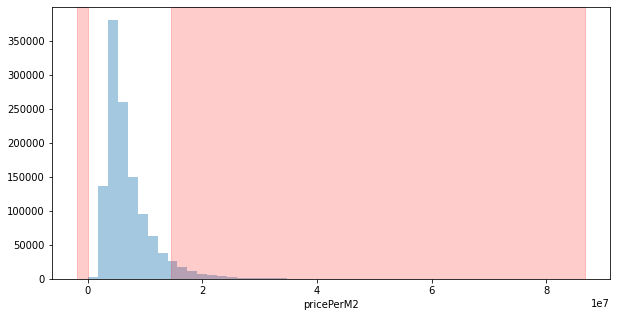

In [ ]:
plt.figure(figsize=(10,5))

sns.distplot(raw.pricePerM2, kde=False)

# 이상치 영역 박스 그리기

plt.axvspan(xmin=lower, xmax=raw.pricePerM2.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=raw.pricePerM2.max(), alpha=0.2, color='red')

print("비대칭도: %f" % raw['pricePerM2'].skew())
print("첨도: %f" % raw['pricePerM2'].kurt())

In [ ]:
#이상치 제거 후 데이터 갯수

df = raw[(raw['pricePerM2'] < upper) & (raw['pricePerM2'] > lower)]

len(df)

1134870

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


비대칭도: 0.924768
첨도: 0.251087


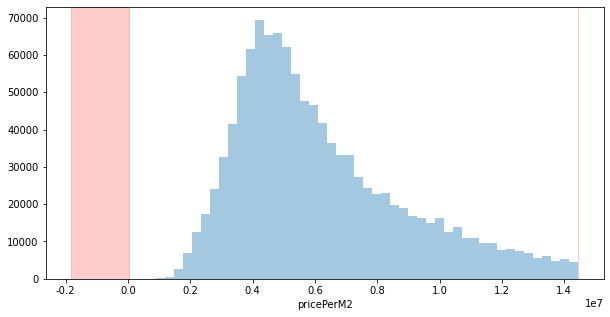

In [ ]:
#이상치 제거 후 

plt.figure(figsize=(10,5))
sns.distplot(df.pricePerM2, kde=False)


# 이상치 영역 박스 그리기

plt.axvspan(xmin=lower, xmax=df.pricePerM2.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=df.pricePerM2.max(), alpha=0.2, color='red')

print("비대칭도: %f" % df['pricePerM2'].skew())
print("첨도: %f" % df['pricePerM2'].kurt())

In [ ]:
df

,BEECgroup,Gseed,area,floor,ConstructionYear,officialValue,parking,ParkingSpace,pricePerM2,saedae,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
0,NaN,NaN,105.99,4,2009.0,5.133333e+08,NaN,NaN,5.283517e+06,NaN,2009,0.0,0,1,0,0,0
1,NaN,NaN,89.55,8,2009.0,4.573333e+08,NaN,NaN,7.356784e+06,NaN,2009,0.0,0,1,0,0,0
2,NaN,NaN,270.25,1,2008.0,2.232000e+09,NaN,NaN,1.047249e+07,NaN,2009,1.0,0,1,0,0,0
3,NaN,NaN,84.89,4,2008.0,6.251429e+08,NaN,NaN,8.834963e+06,NaN,2009,1.0,0,1,0,0,0
4,NaN,NaN,211.20,6,2008.0,1.848000e+09,NaN,NaN,1.136364e+07,NaN,2009,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205245,NaN,NaN,54.53,2,2002.0,1.710000e+08,NaN,NaN,6.051715e+06,NaN,2021,19.0,0,0,0,0,1
1205246,NaN,NaN,84.91,3,2002.0,2.740000e+08,NaN,NaN,5.535273e+06,NaN,2021,19.0,0,0,0,0,1
1205247,NaN,NaN,41.40,4,2002.0,1.087733e+08,NaN,NaN,4.903382e+06,NaN,2021,19.0,0,0,0,0,1
1205248,NaN,NaN,41.40,4,2002.0,1.087733e+08,NaN,NaN,4.734300e+06,NaN,2021,19.0,0,0,0,0,1


In [ ]:
df.floor.unique()

array([ 4,  8,  1,  6,  3,  5,  7,  9, 10, 11, 12, 13, 14, 15, 16, 18, 22,
       25,  2, 17, 19, 20, 21, 23, 24, 26, 50, 62, 31, 35, 41, 47, 29, -1,
       27, 28, 30, 32, 33, 34, 43, 48, 37, 39, 36, 40, 45, 46, 51, 38, 52,
       54, 55, 59, 69, 42, 56, -2, 49, 63, 67, 44, 53, 58, 57, 64, 60, 65,
       66, 68, -3, -4, 61])

In [ ]:
# 마이너스값 0 대체

df[df < 0] = 0

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


,BEECgroup,Gseed,area,floor,ConstructionYear,officialValue,parking,ParkingSpace,pricePerM2,saedae,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
0,NaN,NaN,105.99,4,2009.0,5.133333e+08,NaN,NaN,5.283517e+06,NaN,2009,0.0,0,1,0,0,0
1,NaN,NaN,89.55,8,2009.0,4.573333e+08,NaN,NaN,7.356784e+06,NaN,2009,0.0,0,1,0,0,0
2,NaN,NaN,270.25,1,2008.0,2.232000e+09,NaN,NaN,1.047249e+07,NaN,2009,1.0,0,1,0,0,0
3,NaN,NaN,84.89,4,2008.0,6.251429e+08,NaN,NaN,8.834963e+06,NaN,2009,1.0,0,1,0,0,0
4,NaN,NaN,211.20,6,2008.0,1.848000e+09,NaN,NaN,1.136364e+07,NaN,2009,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205245,NaN,NaN,54.53,2,2002.0,1.710000e+08,NaN,NaN,6.051715e+06,NaN,2021,19.0,0,0,0,0,1
1205246,NaN,NaN,84.91,3,2002.0,2.740000e+08,NaN,NaN,5.535273e+06,NaN,2021,19.0,0,0,0,0,1
1205247,NaN,NaN,41.40,4,2002.0,1.087733e+08,NaN,NaN,4.903382e+06,NaN,2021,19.0,0,0,0,0,1
1205248,NaN,NaN,41.40,4,2002.0,1.087733e+08,NaN,NaN,4.734300e+06,NaN,2021,19.0,0,0,0,0,1


In [ ]:
df.floor.unique()

array([ 4,  8,  1,  6,  3,  5,  7,  9, 10, 11, 12, 13, 14, 15, 16, 18, 22,
       25,  2, 17, 19, 20, 21, 23, 24, 26, 50, 62, 31, 35, 41, 47, 29,  0,
       27, 28, 30, 32, 33, 34, 43, 48, 37, 39, 36, 40, 45, 46, 51, 38, 52,
       54, 55, 59, 69, 42, 56, 49, 63, 67, 44, 53, 58, 57, 64, 60, 65, 66,
       68, 61])

In [ ]:
output_file = r'/content/drive/MyDrive/Colab Notebooks/apt/iqr.csv'
df.to_csv(output_file, index=False) 

# IsolationForest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
nonull = df.copy()

In [ ]:
#BEEC, Gseed null 값 5로 처리

nonull['BEECgroup'] = nonull.BEECgroup.fillna(0)
nonull['Gseed'] = nonull.Gseed.fillna(0)

In [ ]:
nonull.BEECgroup.unique()

array([0., 2., 3., 1., 4.])

In [ ]:
# 평당 가격순으로 정렬 후 앞, 뒤에 있는 값으로 null값 채워줌

nonull = nonull.sort_values(by='pricePerM2')
nonull = nonull.fillna(method='ffill')
nonull = nonull.fillna(method='bfill')

In [ ]:
nonull.isnull().sum()

BEECgroup                0
Gseed                    0
area                     0
floor                    0
ConstructionYear         0
officialValue            0
parking                  0
ParkingSpace             0
pricePerM2               0
saedae                   0
year                     0
age                      0
districtGroup_Dongbuk    0
districtGroup_Dongnam    0
districtGroup_Dosim      0
districtGroup_Seobuk     0
districtGroup_Seonam     0
dtype: int64

In [ ]:
nonull.dtypes

BEECgroup                float64
Gseed                    float64
area                     float64
floor                      int64
ConstructionYear         float64
officialValue            float64
parking                  float64
ParkingSpace             float64
pricePerM2               float64
saedae                   float64
year                       int64
age                      float64
districtGroup_Dongbuk      int64
districtGroup_Dongnam      int64
districtGroup_Dosim        int64
districtGroup_Seobuk       int64
districtGroup_Seonam       int64
dtype: object

In [ ]:
nonull

,BEECgroup,Gseed,area,floor,ConstructionYear,officialValue,parking,ParkingSpace,pricePerM2,saedae,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
152677,0.0,0.0,97.86,6,2005.0,2.820000e+08,2431.0,1.428,5.109340e+04,1702.0,2008,3.0,0,1,0,0,0
697560,0.0,0.0,84.78,3,2004.0,1.880000e+08,2431.0,1.428,5.897617e+04,1702.0,2007,3.0,0,1,0,0,0
272916,0.0,0.0,56.97,7,1999.0,9.900000e+07,2431.0,1.428,6.143584e+04,1702.0,2010,11.0,0,0,0,0,1
1136976,0.0,0.0,100.53,2,2008.0,9.900000e+07,2431.0,1.428,7.858351e+04,1702.0,2008,0.0,0,0,0,1,0
1136975,0.0,0.0,83.70,2,2008.0,9.900000e+07,2431.0,1.428,7.885305e+04,1702.0,2008,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788540,0.0,0.0,105.89,3,1979.0,9.753663e+08,0.0,0.000,1.444896e+07,1212.0,2017,38.0,0,1,0,0,0
1085551,0.0,0.0,84.78,2,1994.0,5.937931e+08,0.0,0.000,1.444916e+07,638.0,2018,24.0,0,0,1,0,0
1150663,0.0,0.0,55.02,10,1987.0,7.107222e+08,1879.0,0.606,1.444929e+07,3100.0,2019,32.0,0,0,0,0,1
254253,0.0,0.0,147.41,7,1978.0,1.556667e+09,0.0,0.000,1.444949e+07,296.0,2009,31.0,0,1,0,0,0


In [ ]:
nonull=nonull.rename(columns={'saedae':'households'})

In [ ]:
nonull=nonull.rename(columns={'households':'Households'})
nonull=nonull.rename(columns={'officialValue':'OfficialValue'})

In [ ]:
cols = ['area', 'floor', 'ConstructionYear', 'OfficialValue', 'parking', 'ParkingSpace', 'Households', 'age'] 

#cols = nonull.columns.tolist()
#cols
cols2=['BEECgroup', 'Gseed']

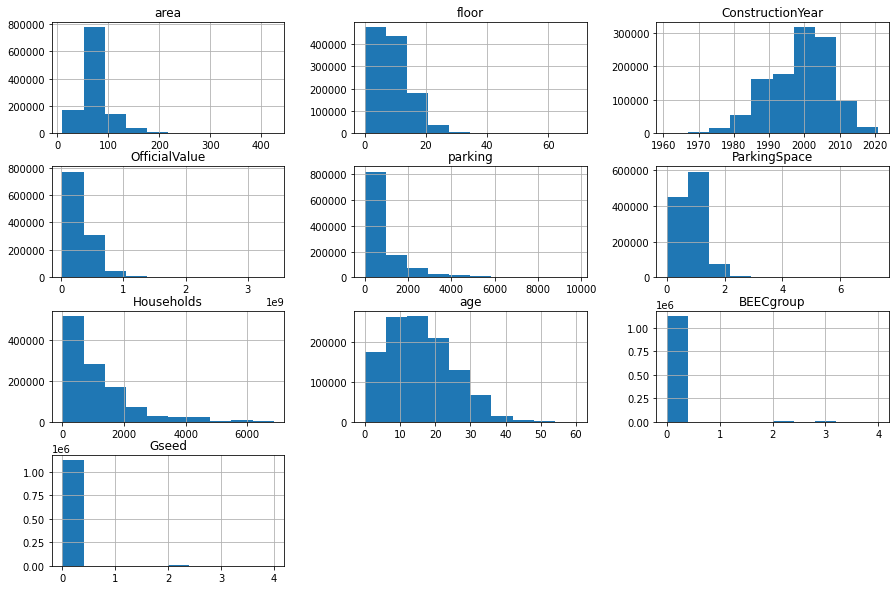

In [ ]:
nonull[cols].hist(figsize=(15,10));

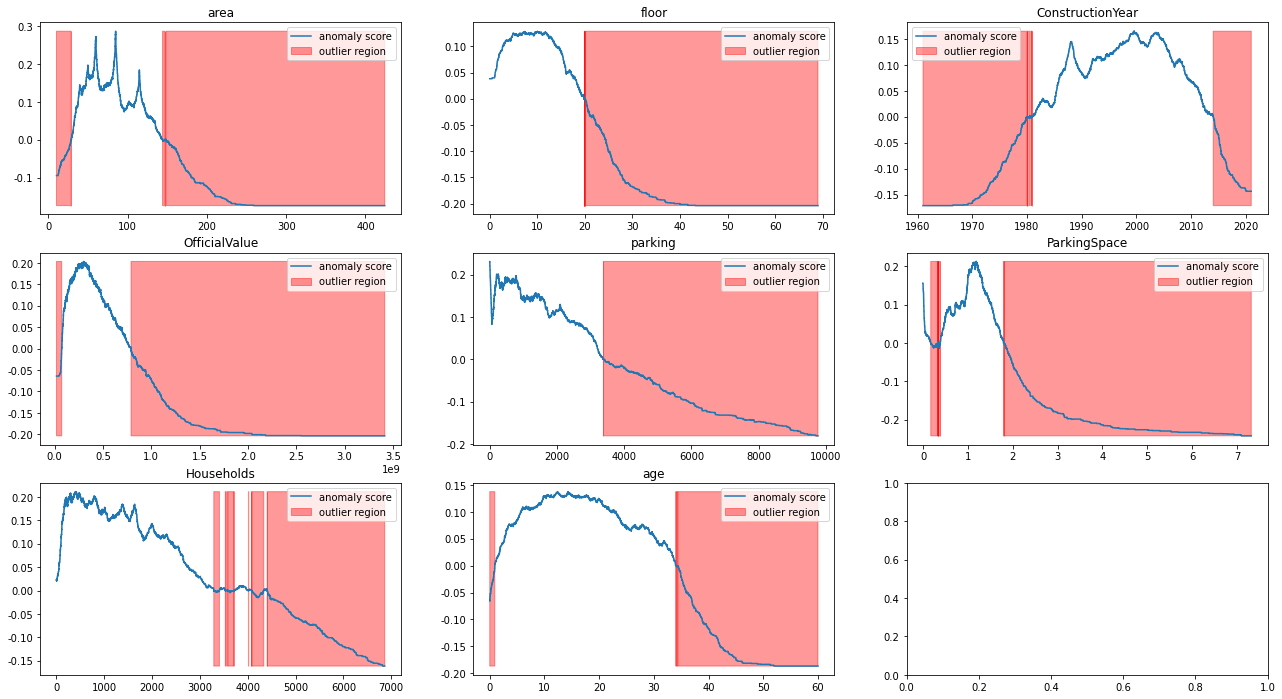

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(22, 12), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.04),
                       max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
    isolation_forest.fit(nonull[column].values.reshape(-1,1))

    xx = np.linspace(nonull[column].min(), nonull[column].max(), len(nonull)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

nonull2=nonull.copy()

clf = IsolationForest(n_estimators=10, max_samples='auto', contamination=float(.04),
                       max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(nonull[['area']])



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.04, n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
anomaly = clf.predict(nonull[['area']])
anomaly = pd.DataFrame(anomaly, columns = ['anomaly'])
anomaly[anomaly['anomaly'] == 1].index.values   #이상치 값 1인 컬럼 인덱스

anomaly

,anomaly
0,1
1,1
2,1
3,1
4,1
...,...
1134865,1
1134866,1
1134867,1
1134868,1


In [ ]:
nonull = nonull.iloc[anomaly[anomaly['anomaly'] == 1].index.values]

nonull

,BEECgroup,Gseed,area,floor,ConstructionYear,OfficialValue,parking,ParkingSpace,pricePerM2,Households,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
152677,0.0,0.0,97.86,6,2005.0,2.820000e+08,2431.0,1.428,5.109340e+04,1702.0,2008,3.0,0,1,0,0,0
697560,0.0,0.0,84.78,3,2004.0,1.880000e+08,2431.0,1.428,5.897617e+04,1702.0,2007,3.0,0,1,0,0,0
272916,0.0,0.0,56.97,7,1999.0,9.900000e+07,2431.0,1.428,6.143584e+04,1702.0,2010,11.0,0,0,0,0,1
1136976,0.0,0.0,100.53,2,2008.0,9.900000e+07,2431.0,1.428,7.858351e+04,1702.0,2008,0.0,0,0,0,1,0
1136975,0.0,0.0,83.70,2,2008.0,9.900000e+07,2431.0,1.428,7.885305e+04,1702.0,2008,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835054,0.0,0.0,59.52,3,1999.0,5.922941e+08,2280.0,1.324,1.444892e+07,1722.0,2018,19.0,0,1,0,0,0
788540,0.0,0.0,105.89,3,1979.0,9.753663e+08,0.0,0.000,1.444896e+07,1212.0,2017,38.0,0,1,0,0,0
1085551,0.0,0.0,84.78,2,1994.0,5.937931e+08,0.0,0.000,1.444916e+07,638.0,2018,24.0,0,0,1,0,0
1150663,0.0,0.0,55.02,10,1987.0,7.107222e+08,1879.0,0.606,1.444929e+07,3100.0,2019,32.0,0,0,0,0,1


In [ ]:
nonull.BEECgroup.unique()

array([0., 3., 2., 4., 1.])

In [ ]:
nonull.reset_index(drop = True, inplace = True)
print("Number of Outliers:", anomaly[anomaly['anomaly'] == -1].shape[0])
print("Number of rows without outliers:", nonull.shape[0])

Number of Outliers: 44429
Number of rows without outliers: 1090441


In [ ]:
anomaly

,anomaly
0,1
1,1
2,1
3,1
4,1
...,...
1134865,1
1134866,1
1134867,1
1134868,1


In [ ]:
nonull

,BEECgroup,Gseed,area,floor,ConstructionYear,OfficialValue,parking,ParkingSpace,pricePerM2,Households,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
0,0.0,0.0,97.86,6,2005.0,2.820000e+08,2431.0,1.428,5.109340e+04,1702.0,2008,3.0,0,1,0,0,0
1,0.0,0.0,84.78,3,2004.0,1.880000e+08,2431.0,1.428,5.897617e+04,1702.0,2007,3.0,0,1,0,0,0
2,0.0,0.0,56.97,7,1999.0,9.900000e+07,2431.0,1.428,6.143584e+04,1702.0,2010,11.0,0,0,0,0,1
3,0.0,0.0,100.53,2,2008.0,9.900000e+07,2431.0,1.428,7.858351e+04,1702.0,2008,0.0,0,0,0,1,0
4,0.0,0.0,83.70,2,2008.0,9.900000e+07,2431.0,1.428,7.885305e+04,1702.0,2008,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090436,0.0,0.0,59.52,3,1999.0,5.922941e+08,2280.0,1.324,1.444892e+07,1722.0,2018,19.0,0,1,0,0,0
1090437,0.0,0.0,105.89,3,1979.0,9.753663e+08,0.0,0.000,1.444896e+07,1212.0,2017,38.0,0,1,0,0,0
1090438,0.0,0.0,84.78,2,1994.0,5.937931e+08,0.0,0.000,1.444916e+07,638.0,2018,24.0,0,0,1,0,0
1090439,0.0,0.0,55.02,10,1987.0,7.107222e+08,1879.0,0.606,1.444929e+07,3100.0,2019,32.0,0,0,0,0,1


In [ ]:
output_file = r'/content/drive/MyDrive/Colab Notebooks/apt/isol3.csv'
nonull.to_csv(output_file, index=False) 